# Course Project : Enhancing Machine Learning Model Evaluation With Bootstrapping Techniques
Jennifer Zhuang, Fall 2024

## Model Evaluation
- Below are metrics we use to evaluation the performance of our machine learning models

$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}$$
$$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}$$
$$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$$
$$\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

$ \text{Where}:$
- $TP: \text{True Positives}  $
- $ TN: \text{True Negatives}  $ 
- $ FP: \text{False Positives} $ 
- $ FN: \text{False Negatives} $

- We note the following
$$ \mathbf{\theta} \text{ : Our Statistic of Interest}$$
$$\text{Accuracy, Precision,}$$
$$ \text{and or F1 Score } etc. $$
$$\mathbf{\hat{\theta}} : \text{estimate of } \theta \text{ based on test data }$$

Below are our bootstrapping formulas and steps for machine learning performance metrics, such as accuracy, precision, recall, or F1-score:

**1. Bootstrap Resampling**

Given a dataset $ D = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\} $, create bootstrap samples $ D^*_b $ by sampling with replacement:

$$
D^*_b = \{(x_1^*, y_1^*), (x_2^*, y_2^*), \dots, (x_n^*, y_n^*)\}, \quad b = 1, \dots, B
$$

where $ B $ is the total number of bootstrap samples.

**2. Train and Evaluate the Model**

For each bootstrap sample $ D^*_b $:  
1. Train the model $ f_b $ on $ D^*_b $.  
2. Evaluate the model on the **out-of-bag (OOB)** data, $ D_{\text{OOB}}^b $, and calculate the performance metric $ T_b^* $ (e.g., accuracy, precision).

$$
T_b^* = g(D_{\text{OOB}}^b, f_b)
$$

where $ g $ is the function that computes the performance metric.

**3. Empirical Distribution of the Metric**

After $ B $ bootstrap samples, the empirical distribution of the performance metric is:  

$$
\{T_1^*, T_2^*, \dots, T_B^*\}
$$

This approximates the sampling distribution of the performance metric (e.g., accuracy).

**4. Bootstrap Mean and Variance of the Metric**

- **Mean** (average performance metric):  

$$
\bar{T}^* = \frac{1}{B} \sum_{b=1}^B T_b^*
$$

- **Variance** (variability of the metric):  

$$
\text{Var}(T^*) = \frac{1}{B-1} \sum_{b=1}^B \left(T_b^* - \bar{T}^*\right)^2
$$

**5. Confidence Intervals (Percentile Method)**

To construct a $ 100(1-\alpha)\% $ confidence interval for the performance metric:

$$
\text{CI} = \left[T^*_{\alpha/2}, T^*_{1-\alpha/2}\right]
$$

where $ T^*_{\alpha/2} $ and $ T^*_{1-\alpha/2} $ are the $ \alpha/2 $-th and $ (1-\alpha/2) $-th percentiles of the bootstrap distribution.

## Our Dataset: Scikit Learn Breast Cancer Diagnostics

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target
df = pd.concat([X, y.rename('Target')], axis=1)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

In [2]:
df['Target'].describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Target, dtype: float64

## Single Train-Test Split & 5 Fold Cross Validation
- We perform a single train-test split below
- This single split will be used across all models 

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression

Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



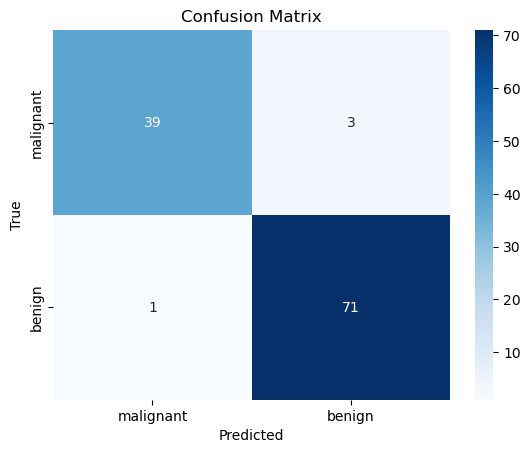

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Train our logistic regression model on the training set
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1-Score: {lr_f1:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

__5 folds Cross Validation__
- Next we perform a 5 fold cross validation split of the data
- The same 5 folds will be used across all models

In [39]:
from sklearn.model_selection import cross_validate, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
log_reg = LogisticRegression(max_iter=5000, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']
log_reg_cv_results = cross_validate(log_reg, X, y, cv=cv, scoring=scoring, return_train_score=False)
for metric in scoring:
    print(f"{metric.capitalize()}: Mean = {np.mean(log_reg_cv_results[f'test_{metric}']):.2f}, Std = {np.std(log_reg_cv_results[f'test_{metric}']):.2f}")
    print(log_reg_cv_results[f'test_{metric}'])
    print()

Accuracy: Mean = 0.95, Std = 0.02
[0.96491228 0.92105263 0.96491228 0.94736842 0.97345133]

Precision: Mean = 0.96, Std = 0.03
[1.         0.90789474 0.94736842 0.97142857 0.95945946]

Recall: Mean = 0.97, Std = 0.03
[0.94366197 0.97183099 1.         0.94444444 1.        ]

F1: Mean = 0.96, Std = 0.01
[0.97101449 0.93877551 0.97297297 0.95774648 0.97931034]



### Random Forests

Accuracy: 0.96
Precision: 0.96
Recall: 0.97
F1-Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



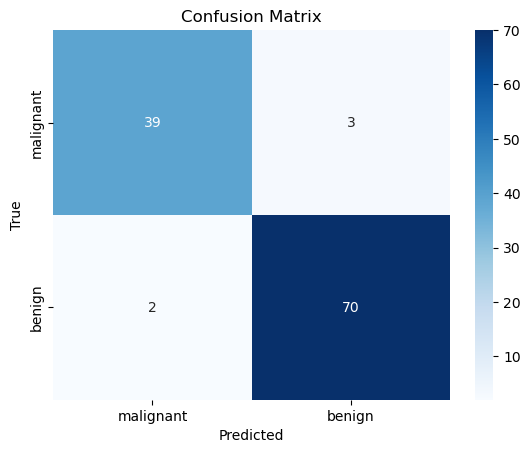

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

__5 Fold Cross Validation__

In [73]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']
rf_cv_results = cross_validate(rf_model, X, y, cv=cv, scoring=scoring, return_train_score=False)
for metric in scoring:
    print(f"{metric.capitalize()}: Mean = {np.mean(rf_cv_results[f'test_{metric}']):.2f}, Std = {np.std(rf_cv_results[f'test_{metric}']):.2f}")
    print(rf_cv_results[f'test_{metric}'])
    print()

Accuracy: Mean = 0.96, Std = 0.01
[0.96491228 0.93859649 0.95614035 0.94736842 0.97345133]

Precision: Mean = 0.97, Std = 0.03
[0.98550725 0.92105263 0.94666667 1.         0.97222222]

Recall: Mean = 0.97, Std = 0.03
[0.95774648 0.98591549 0.98611111 0.91666667 0.98591549]

F1: Mean = 0.97, Std = 0.01
[0.97142857 0.95238095 0.96598639 0.95652174 0.97902098]



### K Nearest Neighbors

Accuracy: 0.96
Precision: 0.96
Recall: 0.97
F1-Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



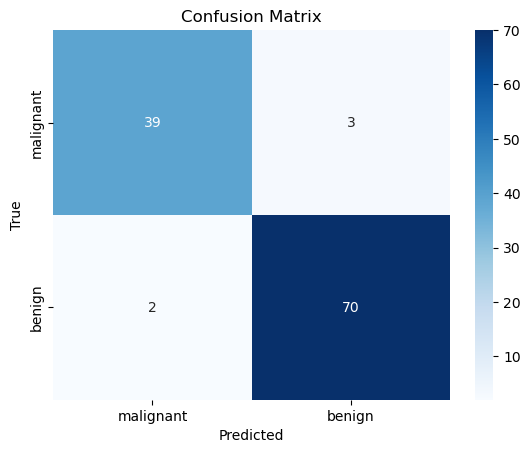

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Use 5 neighbors (default)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-Score: {knn_f1:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

__5 Fold Cross Validation__

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=5)
scoring = ['accuracy', 'precision', 'recall', 'f1']
knn_cv_results = cross_validate(knn_model, X, y, cv=cv, scoring=scoring, return_train_score=False)
for metric in scoring:
    print(f"{metric.capitalize()}: Mean = {np.mean(knn_cv_results[f'test_{metric}']):.2f}, Std = {np.std(knn_cv_results[f'test_{metric}']):.2f}")
    print(knn_cv_results[f'test_{metric}'])
    print()

Accuracy: Mean = 0.94, Std = 0.02
[0.92982456 0.90350877 0.92982456 0.95614035 0.95575221]

Precision: Mean = 0.94, Std = 0.03
[0.95652174 0.88461538 0.93243243 0.98550725 0.93421053]

Recall: Mean = 0.96, Std = 0.02
[0.92957746 0.97183099 0.95833333 0.94444444 1.        ]

F1: Mean = 0.95, Std = 0.01
[0.94285714 0.9261745  0.94520548 0.96453901 0.96598639]



### Neural Network

Accuracy: 0.96
Precision: 0.99
Recall: 0.96
F1-Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



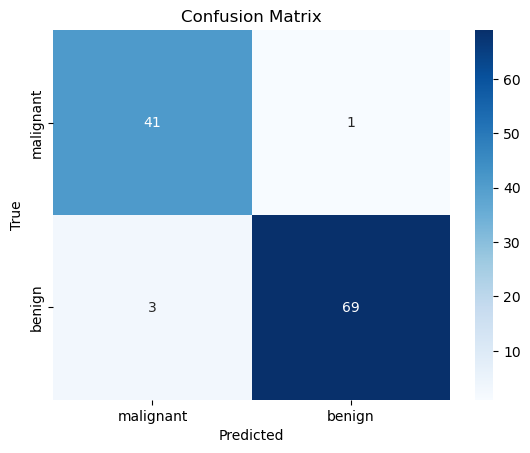

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
nn_accuracy = accuracy_score(y_test, y_pred)
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {nn_accuracy:.2f}")
print(f"Precision: {nn_precision:.2f}")
print(f"Recall: {nn_recall:.2f}")
print(f"F1-Score: {nn_f1:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


__5 Fold Cross Validation__

In [75]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']
nn_cv_results = cross_validate(nn_model, X, y, cv=cv, scoring=scoring, return_train_score=False)
for metric in scoring:
    print(f"{metric.capitalize()}: Mean = {np.mean(nn_cv_results[f'test_{metric}']):.2f}, Std = {np.std(nn_cv_results[f'test_{metric}']):.2f}")
    print(nn_cv_results[f'test_{metric}'])
    print()

Accuracy: Mean = 0.93, Std = 0.02
[0.92982456 0.93859649 0.89473684 0.94736842 0.94690265]

Precision: Mean = 0.93, Std = 0.01
[0.94366197 0.93243243 0.92857143 0.93421053 0.92207792]

Recall: Mean = 0.96, Std = 0.03
[0.94366197 0.97183099 0.90277778 0.98611111 1.        ]

F1: Mean = 0.95, Std = 0.02
[0.94366197 0.95172414 0.91549296 0.95945946 0.95945946]



### Results:
__Single Train Test Split:__

In [69]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "KNN", "Neural Network"],
    "Accuracy": [lr_accuracy, rf_accuracy, knn_accuracy, nn_accuracy],
    "Precision": [lr_precision, rf_precision, knn_precision, nn_precision],
    "Recall": [lr_recall, rf_recall, knn_recall, nn_recall],
    "F1-Score": [lr_f1, rf_f1, knn_f1, nn_f1]
}
results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.964912,0.959459,0.986111,0.972603
1,Random Forest,0.956140,0.958904,0.972222,0.965517
2,KNN,0.956140,0.958904,0.972222,0.965517
3,Neural Network,0.964912,0.985714,0.958333,0.971831


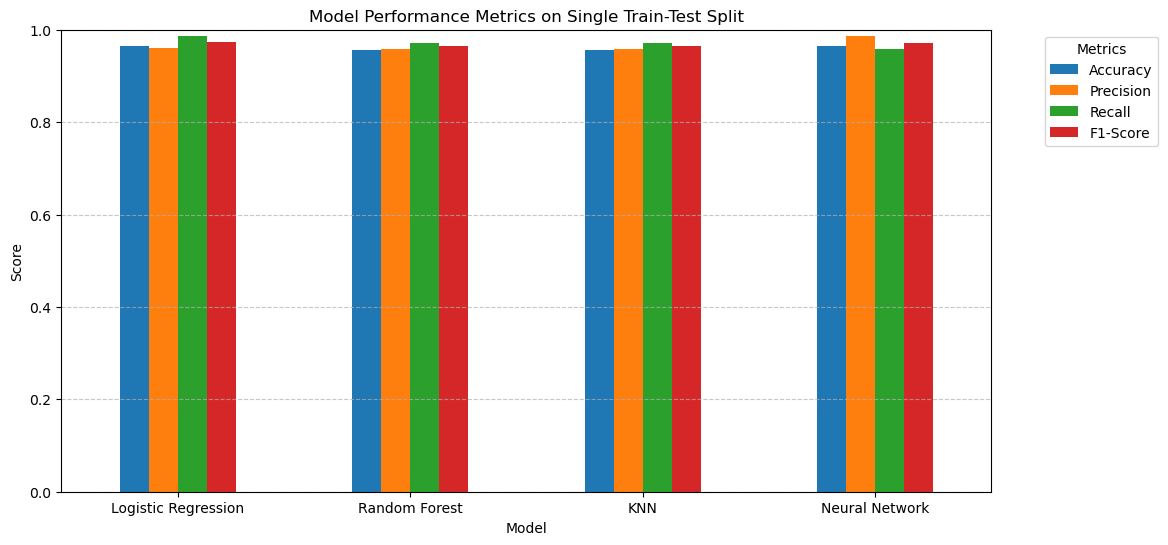

In [70]:
import matplotlib.pyplot as plt

# Set the index for the DataFrame
results_df.set_index("Model", inplace=True)
results_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Metrics on Single Train-Test Split")
plt.ylabel("Score")
plt.ylim(0, 1.0)  # Adjust y-axis for better comparison
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), title="Metrics")
plt.xticks(rotation=0)
plt.show()

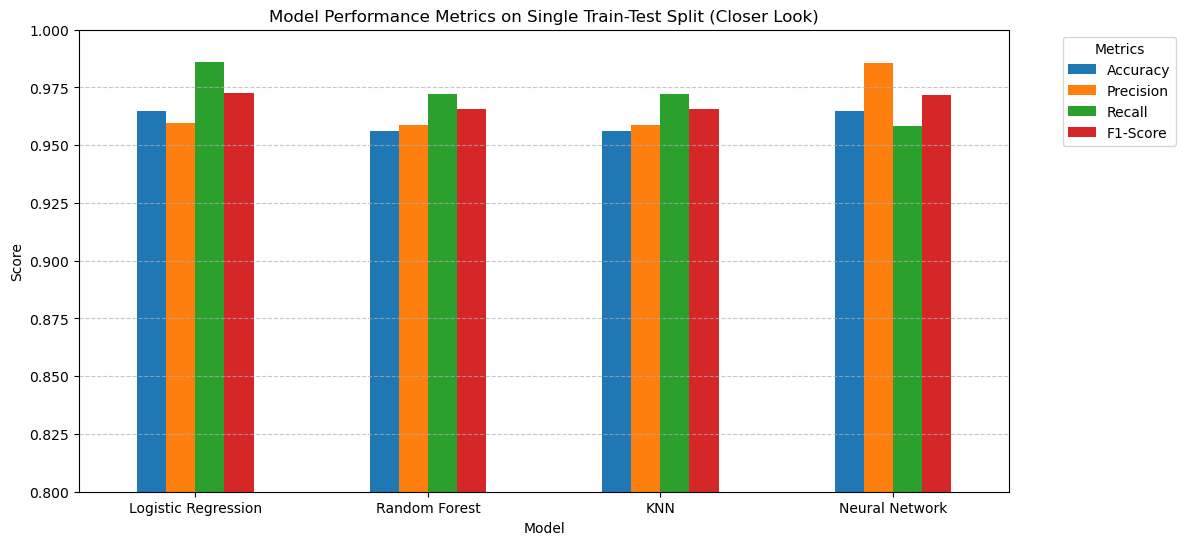

In [71]:
results_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Metrics on Single Train-Test Split (Closer Look)")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)  # Adjust y-axis for better comparison
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), title="Metrics")
plt.xticks(rotation=0)
plt.show()

__5 Fold Cross Validation__

In [83]:
results_summary = {
    "Model": ["Logistic Regression", "Random Forest", "KNN", "Neural Network"],
    "Accuracy (Avg ± SD)": [
        f"{np.mean(log_reg_cv_results['test_accuracy']):.2f} ± {np.std(log_reg_cv_results['test_accuracy']):.2f}",
        f"{np.mean(rf_cv_results['test_accuracy']):.2f} ± {np.std(rf_cv_results['test_accuracy']):.2f}",
        f"{np.mean(knn_cv_results['test_accuracy']):.2f} ± {np.std(knn_cv_results['test_accuracy']):.2f}",
        f"{np.mean(nn_cv_results['test_accuracy']):.2f} ± {np.std(nn_cv_results['test_accuracy']):.2f}"
    ],
    "Precision (Avg ± SD)": [
        f"{np.mean(log_reg_cv_results['test_precision']):.2f} ± {np.std(log_reg_cv_results['test_precision']):.2f}",
        f"{np.mean(rf_cv_results['test_precision']):.2f} ± {np.std(rf_cv_results['test_precision']):.2f}",
        f"{np.mean(knn_cv_results['test_precision']):.2f} ± {np.std(knn_cv_results['test_precision']):.2f}",
        f"{np.mean(nn_cv_results['test_precision']):.2f} ± {np.std(nn_cv_results['test_precision']):.2f}"
    ],
    "Recall (Avg ± SD)": [
        f"{np.mean(log_reg_cv_results['test_recall']):.2f} ± {np.std(log_reg_cv_results['test_recall']):.2f}",
        f"{np.mean(rf_cv_results['test_recall']):.2f} ± {np.std(rf_cv_results['test_recall']):.2f}",
        f"{np.mean(knn_cv_results['test_recall']):.2f} ± {np.std(knn_cv_results['test_recall']):.2f}",
        f"{np.mean(nn_cv_results['test_recall']):.2f} ± {np.std(nn_cv_results['test_recall']):.2f}"
    ],
    "F1-Score (Avg ± SD)": [
        f"{np.mean(log_reg_cv_results['test_f1']):.2f} ± {np.std(log_reg_cv_results['test_f1']):.2f}",
        f"{np.mean(rf_cv_results['test_f1']):.2f} ± {np.std(rf_cv_results['test_f1']):.2f}",
        f"{np.mean(knn_cv_results['test_f1']):.2f} ± {np.std(knn_cv_results['test_f1']):.2f}",
        f"{np.mean(nn_cv_results['test_f1']):.2f} ± {np.std(nn_cv_results['test_f1']):.2f}"
    ]
}

summary_df = pd.DataFrame(results_summary)
display(summary_df)

,Model,Accuracy (Avg ± SD),Precision (Avg ± SD),Recall (Avg ± SD),F1-Score (Avg ± SD)
0,Logistic Regression,0.95 ± 0.02,0.96 ± 0.03,0.97 ± 0.03,0.96 ± 0.01
1,Random Forest,0.96 ± 0.01,0.97 ± 0.03,0.97 ± 0.03,0.97 ± 0.01
2,KNN,0.94 ± 0.02,0.94 ± 0.03,0.96 ± 0.02,0.95 ± 0.01
3,Neural Network,0.93 ± 0.02,0.93 ± 0.01,0.96 ± 0.03,0.95 ± 0.02


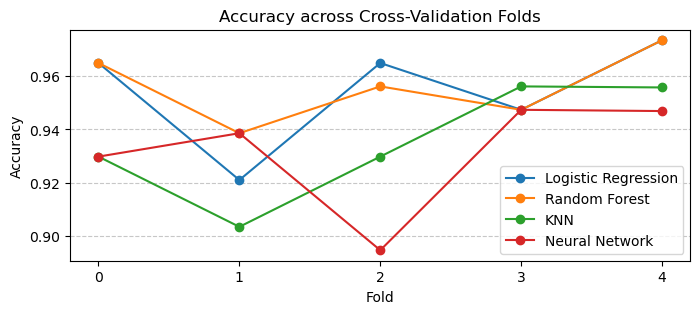

In [84]:
models = ["Logistic Regression", "Random Forest", "KNN", "Neural Network"]
plt.figure(figsize=(8, 3))
for model, results in zip(models, [log_reg_cv_results, rf_cv_results, knn_cv_results, nn_cv_results]):
    plt.plot(results['test_accuracy'], marker='o', label=model)
folds = [0, 1, 2, 3, 4]
plt.xticks(ticks=folds)
plt.title("Accuracy across Cross-Validation Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Bootstrapping Techniques


In [15]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

n_bootstrap = 500 
bootstrap_scores = []
for _ in range(n_bootstrap):
    # Resample
    X_resampled, y_resampled = resample(X, y, random_state=_)
    log_reg = LogisticRegression(max_iter=5000, random_state=42)
    log_reg.fit(X_resampled, y_resampled)
    y_pred = log_reg.predict(X)
    bootstrap_scores.append(accuracy_score(y, y_pred))

# Results
print(f"Logistic Regression Mean Accuracy: {np.mean(bootstrap_scores):.2f}")
print(f"Logistic Regression Std Dev: {np.std(bootstrap_scores):.2f}")

Logistic Regression Mean Accuracy: 0.96
Logistic Regression Std Dev: 0.00


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_bootstrap_scores = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    X_resampled, y_resampled = resample(X, y, random_state=_)
    
    # Fit the model
    rf_model.fit(X_resampled, y_resampled)
    
    # Evaluate on the entire dataset for consistency
    y_pred = rf_model.predict(X)
    rf_bootstrap_scores.append(accuracy_score(y, y_pred))

# Results
print(f"Random Forest Mean Accuracy: {np.mean(rf_bootstrap_scores):.2f}")
print(f"Random Forest Std Dev: {np.std(rf_bootstrap_scores):.2f}")


Random Forest Mean Accuracy: 0.98
Random Forest Std Dev: 0.00


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KNN
# Bootstrap parameters
knn_bootstrap_scores = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Resample the dataset
    knn_model = KNeighborsClassifier(n_neighbors=5)
    X_resampled, y_resampled = resample(X_scaled, y, random_state=_)
    
    # Fit the model
    knn_model.fit(X_resampled, y_resampled)
    
    # Evaluate on the entire dataset for consistency
    y_pred = knn_model.predict(X_scaled)
    knn_bootstrap_scores.append(accuracy_score(y, y_pred))

# Results
print(f"KNN Mean Accuracy: {np.mean(knn_bootstrap_scores):.2f}")
print(f"KNN Std Dev: {np.std(knn_bootstrap_scores):.2f}")


KNN Mean Accuracy: 0.97
KNN Std Dev: 0.01


In [18]:
from sklearn.neural_network import MLPClassifier

# Initialize Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Bootstrap parameters
NN_bootstrap_scores = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Resample the dataset
    X_resampled, y_resampled = resample(X_scaled, y, random_state=_)
    
    # Fit the model
    mlp_model.fit(X_resampled, y_resampled)
    
    # Evaluate on the entire dataset for consistency
    y_pred = mlp_model.predict(X_scaled)
    NN_bootstrap_scores.append(accuracy_score(y, y_pred))

# Results
print(f"Neural Network Mean Accuracy: {np.mean(NN_bootstrap_scores):.2f}")
print(f"Neural Network Std Dev: {np.std(NN_bootstrap_scores):.2f}")


Neural Network Mean Accuracy: 0.99
Neural Network Std Dev: 0.00


## Model Evaluation

In [97]:
def summary_statistics(scores):
    return {
        "Mean Accuracy": np.mean(scores),
        "Std Deviation": np.std(scores),
        "Min": np.min(scores),
        "Q1": np.percentile(scores, 25),
        "Q2": np.median(scores),
        "Q3": np.percentile(scores, 75),
        "Max": np.max(scores)
    }

# Gather all model results
results = {
    "Logistic Regression": summary_statistics(bootstrap_scores),
    "Random Forest": summary_statistics(rf_bootstrap_scores),
    "KNN": summary_statistics(knn_bootstrap_scores),
    "Neural Network": summary_statistics(NN_bootstrap_scores)
}

# Convert to DataFrame for display
results_df = pd.DataFrame(results).T  # Transpose for better readability
results_df.reset_index(inplace=True)
results_df.rename(columns={"index": "Model"}, inplace=True)
display(results_df.round(2))

,Model,Mean Accuracy,Std Deviation,Min,Q1,Q2,Q3,Max
0,Logistic Regression,0.96,0.00,0.95,0.96,0.96,0.96,0.97
1,Random Forest,0.98,0.00,0.97,0.98,0.98,0.99,1.00
2,KNN,0.97,0.01,0.95,0.97,0.97,0.97,0.98
3,Neural Network,0.99,0.00,0.98,0.99,0.99,0.99,1.00


In [109]:
# Calculate 95% Confidence Intervals
def confidence_interval(scores, alpha=0.95):
    lower = np.percentile(scores, (1 - alpha) / 2 * 100)
    upper = np.percentile(scores, (1 + alpha) / 2 * 100)
    mean = np.mean(scores)
    return lower, upper, mean

ci_results = {
    "Model": ["Logistic Regression", "Random Forest", "KNN", "Neural Network"],
    "95% CI Lower": [
        confidence_interval(bootstrap_scores)[0],
        confidence_interval(rf_bootstrap_scores)[0],
        confidence_interval(knn_bootstrap_scores)[0],
        confidence_interval(NN_bootstrap_scores)[0]
    ],
    "95% CI Upper": [
        confidence_interval(bootstrap_scores)[1],
        confidence_interval(rf_bootstrap_scores)[1],
        confidence_interval(knn_bootstrap_scores)[1],
        confidence_interval(NN_bootstrap_scores)[1]
    ]
}

ci_results_df = pd.DataFrame(ci_results)
ci_results_df = ci_results_df.round(3)
display(ci_results_df)

,Model,95% CI Lower,95% CI Upper
0,Logistic Regression,0.949,0.967
1,Random Forest,0.974,0.993
2,KNN,0.960,0.979
3,Neural Network,0.981,0.996


In [112]:
variances = {
    "Model": ["Logistic Regression", "Random Forest", "KNN", "Neural Network"],
    "Variance": [
        np.var(bootstrap_scores, ddof=1),  # ddof=1 for sample variance
        np.var(rf_bootstrap_scores, ddof=1),
        np.var(knn_bootstrap_scores, ddof=1),
        np.var(NN_bootstrap_scores, ddof=1)
    ]
}

import pandas as pd
variance_df = pd.DataFrame(variances)
display(variance_df)

,Model,Variance
0,Logistic Regression,0.000020
1,Random Forest,0.000024
2,KNN,0.000027
3,Neural Network,0.000016


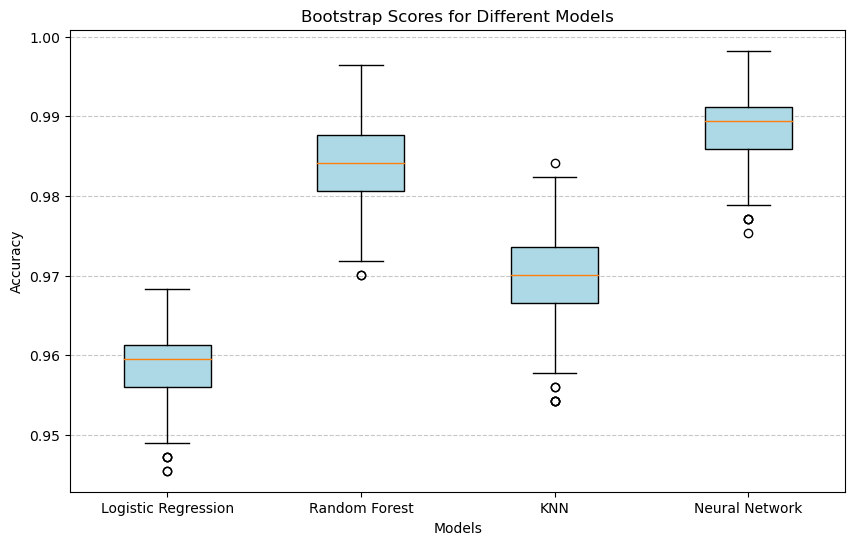

In [88]:
scores = [bootstrap_scores, rf_bootstrap_scores, knn_bootstrap_scores, NN_bootstrap_scores]
labels = ['Logistic Regression', 'Random Forest', 'KNN', 'Neural Network']
plt.figure(figsize=(10, 6))
plt.boxplot(scores, labels=labels, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Bootstrap Scores for Different Models")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

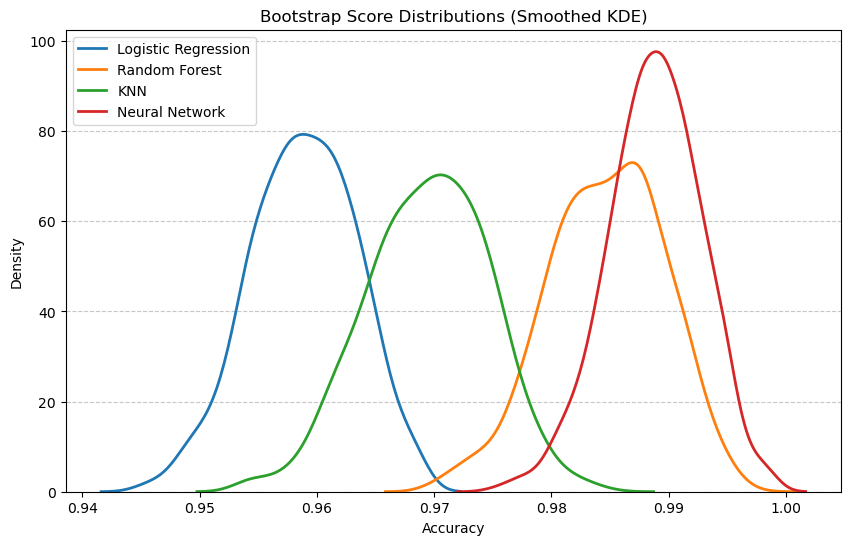

In [89]:
plt.figure(figsize=(10, 6))
sns.kdeplot(bootstrap_scores, linewidth=2, label='Logistic Regression')
sns.kdeplot(rf_bootstrap_scores, linewidth=2, label='Random Forest')
sns.kdeplot(knn_bootstrap_scores, linewidth=2, label='KNN')
sns.kdeplot(NN_bootstrap_scores, linewidth=2, label='Neural Network')
plt.title("Bootstrap Score Distributions (Smoothed KDE)")
plt.xlabel("Accuracy")
plt.ylabel("Density")
plt.legend(loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()